# The Spark Foundation 

## Data Science & Business Analytics Internship jan-2022

### Author :- Shamu Vishwakarma

### Task 1 :- Predict the percentage of student based on the no of study hours

### Objective :-  predict the percentage of an student based on the no. of study  hours.

### Importing all necessary libraries 

In [3]:
import pandas as pd
# for data manipulation & working with csv files

import numpy as np
# for numerical manipulation

import matplotlib.pyplot as plt
# for plotting graphs

import seaborn as sns
# for making statistical graphics

from sklearn.model_selection import train_test_split
# for splitting data set

from sklearn.linear_model import LinearRegression
# for linear regression
%matplotlib inline


### Reading data from remote link 

In [4]:
url="http://bit.ly/w-data"
Student_Data=pd.read_csv(url)
print("Data succesfully loaded")

Data succesfully loaded


In [5]:
#Reading Data set
Student_Data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
# Checking shape of data set
print(Student_Data.shape)
Student_Data.head() #for reading top five Rows

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
#for reading Bottom five rows
Student_Data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [10]:
# Checking null values in data set
Student_Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
Student_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
# Checking numerical data
Student_Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Now we will plot the Graph using matplotlib to understand relation between columns

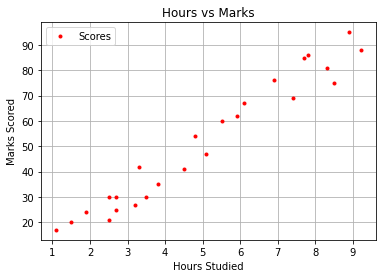

In [13]:
# Plotting the distribution of scores
Student_Data.plot(x='Hours', y='Scores', style='.',color='red')  
plt.title('Hours vs Marks')  
plt.xlabel('Hours Studied')  
plt.ylabel('Marks Scored')  
plt.grid()
plt.show()

Here We observe that there is linear relationship Between the Marks scored by the student & their Respective Study Hours. So, we will use simple linear regression supervised Machine Learning Model to predict the Further values.

In [14]:
# Correlation coeff is 0.976191
# which is a strong positive correlation.

# Checking correlation between columns
Student_Data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Preparing the data

We are going to divide this dataset column (i.e Hours,Scores) into "attribute" (inputs) & "label" (outputs), here Hours is attribute & Scores are label

In [15]:
X = Student_Data.iloc[:, :-1].values  
y = Student_Data.iloc[:, 1:].values  

In [16]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [17]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split
# Splitting the data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
#here 80% of our data is tarining data and 20% is the testing data

print('rows in the total set: {}'.format(Student_Data.shape[0]))
print('rows in the training set: {}'.format(X_train.shape[0]))
print('rows in the test set: {}'.format(X_test.shape[0]))

rows in the total set: 25
rows in the training set: 20
rows in the test set: 5


In [19]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

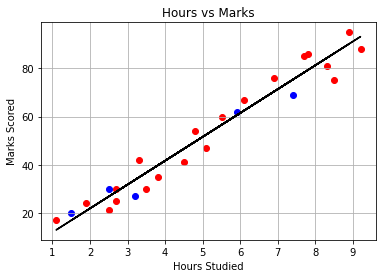

In [20]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train,color="red")
plt.scatter(X_test, y_test,color="blue")
plt.plot(X, line, color="black");
plt.title('Hours vs Marks')  
plt.xlabel('Hours Studied')  
plt.ylabel('Marks Scored')  
plt.grid()
plt.show()

## Testing our Linear Regression Model 

In [21]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
print(y_test)
print(y_pred)

[[20]
 [27]
 [69]
 [30]
 [62]]
[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [23]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})  
df 

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


## What will be the predicted score if a student study for 9.10 hrs/day?

In [24]:
# now we are ready to test with your own data
hours = 9.10
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours)+" hr.")
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.1 hr.
Predicted Score = [92.20513402]


## Hence we can conclude that if a student is involved in 9.10 hours per day , then there is a possibility that the percentage comes out to be  92.20513402

In [27]:
from tkinter import *
def alert_popup(title, message):
    """Generate a pop-up window ."""
    root = Tk()
    root.title(title)
    w = 300     # popup window width
    h = 200     # popup window height
    sw = root.winfo_screenwidth()
    sh = root.winfo_screenheight()
    x = (sw - w)/2
    y = (sh - h)/2
    root.geometry('%dx%d+%d+%d' % (w, h, x, y))
    m = message
    w = Label(root, text=m, width=50, height=10)
    w.pack()
    b = Button(root, text="OK", command=root.destroy, width=10)
    b.pack()
    mainloop()

alert_popup("Predictions", own_pred[0])

## Evaluation of linear regression model 

The final step is to evaluate the performance of algorithms. This step is particularly important to compare how well different algorithms perform on particular data set for simplicity here, we have chosen the means square error.There are many such metrics

In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
